In [1]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
samples_phi = pd.read_csv("fr_samples_phi.csv")
#adj_matrix = pd.read_csv("adj-matrix-FR-stage1.csv",index_col=0)
#elites_data = pd.read_csv("fr_elites_data.csv",index_col=0)

In [3]:
samples_phi.shape

(50, 101)

In [4]:
samples_phi.head()

,barbarapompili,delphinebatho,stanguerini,gilbertcollard,fderugy,oliviagregoire,lachaudb,sylviapinel,bretonxavier,aquatennens,...,rue89,partisocialiste,lobs,enmarchefr,lexpress,fn_officiel,lesechos,lesrepublicains,slatefr,lepoint
0,1.613334,-0.288592,0.679581,1.427705,-0.212930,-0.383216,-0.444958,0.894010,-0.775320,1.733256,...,-0.859131,0.947330,-0.000066,1.786108,1.558724,-0.276248,-1.803179,0.141189,1.529592,0.561496
1,-0.771101,-1.399999,1.842466,-0.751024,2.409731,0.828630,-0.142010,-0.898828,3.024665,-1.218847,...,-0.673019,0.336561,-1.728965,0.838200,-1.757691,1.016270,-0.341123,1.755912,-2.495307,-1.592792
2,0.532075,0.351692,1.681428,-0.378444,0.083192,-0.025651,1.138451,3.229792,0.884533,-1.554071,...,0.921317,2.718859,3.449477,0.638919,1.987297,-0.436890,1.006541,1.308215,-0.083445,0.827814
3,1.251915,1.786023,0.807163,0.039276,-0.839495,-0.141341,-1.205433,1.072443,0.958422,0.314656,...,0.045549,0.360135,0.663551,1.034513,0.266529,1.196549,0.143852,-0.798355,0.396003,-0.226641
4,0.119933,-0.843112,-0.758622,-0.423293,-0.628406,-0.250547,-1.071935,-0.941690,-0.486178,-0.403354,...,-0.393919,-0.604515,-0.510811,-0.713500,-0.844404,-1.471473,-0.194117,-1.176916,-0.295700,-0.832966


In [5]:
# i subtract the mean to get negative values too
phi = samples_phi.mean(axis=0)
print(phi.mean())
phi_center = phi - phi.mean()

0.982607934941


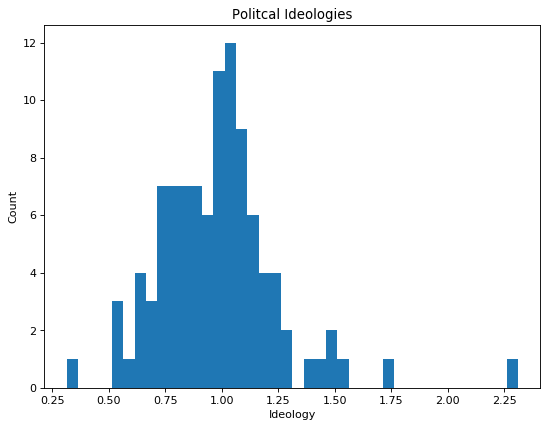

In [6]:
plt.figure(figsize=(8,6), dpi=80)
plt.subplot(111)
plt.hist(phi, bins=40)
plt.title("Politcal Ideologies")
plt.xlabel("Ideology")
plt.ylabel("Count")
plt.show()

In [7]:
#skip this cell
import utils
import tweepy
api = utils.get_tweepy_api(3)
followers = []
for i in range(elites_data.shape[0]):
    eid, name = elites_data.iloc[i][['id', 'screen_name']]
    user = utils.tweepy_api_call(api.get_user, id=eid)
    if not user:
        print(name)
        continue
    followers.append((user.followers_count, name))

NameError: name 'elites_data' is not defined

In [ ]:
#skip this cell
import json
print(json.dumps(sorted(followers, reverse=True), indent=2))

In [8]:
vip = [
    'mlp_officiel',
    'le_figaro',
    'libe',
    '20minutes',
    'jlmelenchon',
    'lesrepublicains',
    'partisocialiste',
    'dupontaignan',
    'jclagarde',
    'gilbertcollard',
    'slefoll'
]


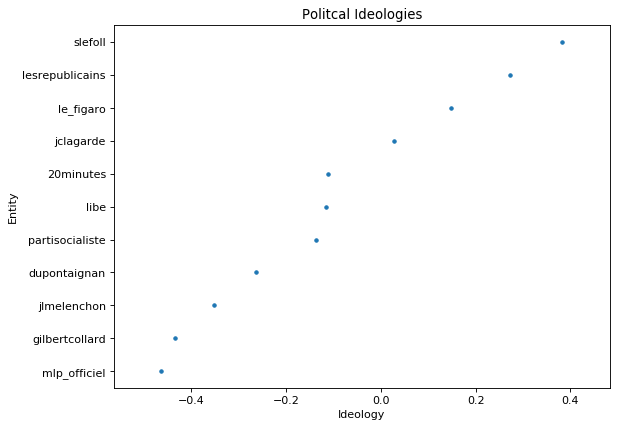

In [9]:
plt.figure(figsize=(8,6), dpi=80)
plt.subplot(111)

sort = phi_center[vip].sort_values()
y_labels = list(sort.index)
x = np.arange(len(vip))
plt.plot(sort.values, x, '.')
plt.title("Politcal Ideologies")
plt.xlabel("Ideology")
plt.ylabel("Entity")

plt.xlim(sort.values[0]-0.1, sort.values[-1]+0.1)

plt.yticks(np.arange(len(vip)), y_labels)

plt.show()